# A3.2 Redes Neuronales

Este proyecto aborda el desarrollo de un modelo de red neuronal para la clasificación automática de dígitos del 0 al 9, utilizando el conjunto de datos MNIST.
Se entrenó un modelo básico, se evaluó su desempeño sobre datos originales y datos modificados (con ruido y rotaciones), y se implementó un sistema de predicción en tiempo real mediante una cámara web.
El proyecto resalta el potencial de las redes neuronales para el reconocimiento de patrones, así como los retos que surgen ante variaciones no vistas durante el entrenamiento.

# 1. Entrenar un modelo de redes neuronales para clasificar los dígitos del 0 al 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

### Carga del dataset MNIST y Preprocesamiento de datos

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

### Crear o cargar modelo

In [3]:
# 3. Definir ruta
model_path = "my_model.h5"

# 4. Entrenar o cargar
if os.path.exists(model_path):
    print("📦 Modelo ya entrenado encontrado. Cargando...")
    model = load_model(model_path)
    history = None  # No habrá historial si solo cargamos
else:
    print("⚙️ No se encontró el modelo. Entrenando uno nuevo...")

    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_images, train_labels_cat,
        epochs=10,
        batch_size=32,
        validation_split=0.2
    )

    model.save(model_path)
    print(f"✅ Modelo guardado en '{model_path}'")


⚙️ No se encontró el modelo. Entrenando uno nuevo...
Epoch 1/10


c:\Users\Ignacio\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8656 - loss: 0.4790 - val_accuracy: 0.9555 - val_loss: 0.1583
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9625 - loss: 0.1313 - val_accuracy: 0.9669 - val_loss: 0.1140
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.0867 - val_accuracy: 0.9717 - val_loss: 0.0965
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0610 - val_accuracy: 0.9725 - val_loss: 0.0944
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0479 - val_accuracy: 0.9725 - val_loss: 0.0898
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9755 - val_loss: 0.0864
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0276 - val_accuracy: 0.9753 - val_loss: 0.0865
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9946 - loss: 0.0198 - val_accurac

✅ Modelo guardado en 'my_model.h5'


# 2. Evaluar desempeño en las imágenes de prueba

Se evaluó el desempeño en el conjunto de prueba.  
Se obtuvo alta precisión y se observó una buena generalización.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9743 - loss: 0.0947
📊 Precisión en test: 0.9767


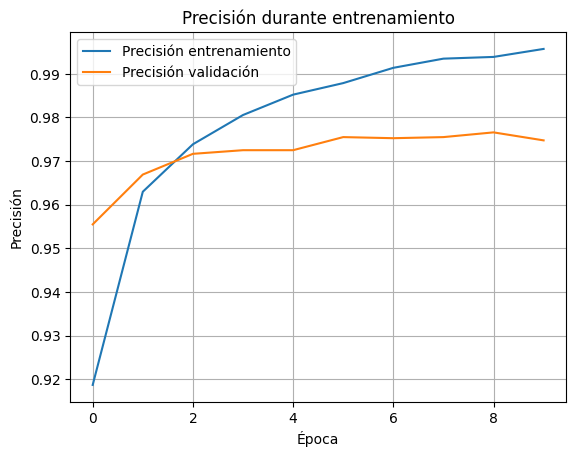

In [4]:

# 5. Evaluar
loss, accuracy = model.evaluate(test_images, test_labels_cat)
print(f"📊 Precisión en test: {accuracy:.4f}")

# 6. Mostrar gráfica solo si hubo entrenamiento
if history:
    plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión validación')
    plt.title('Precisión durante entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

# 3. Generar 50 imágenes (captura de imágenes modificadas)

### Generación automática de imágenes

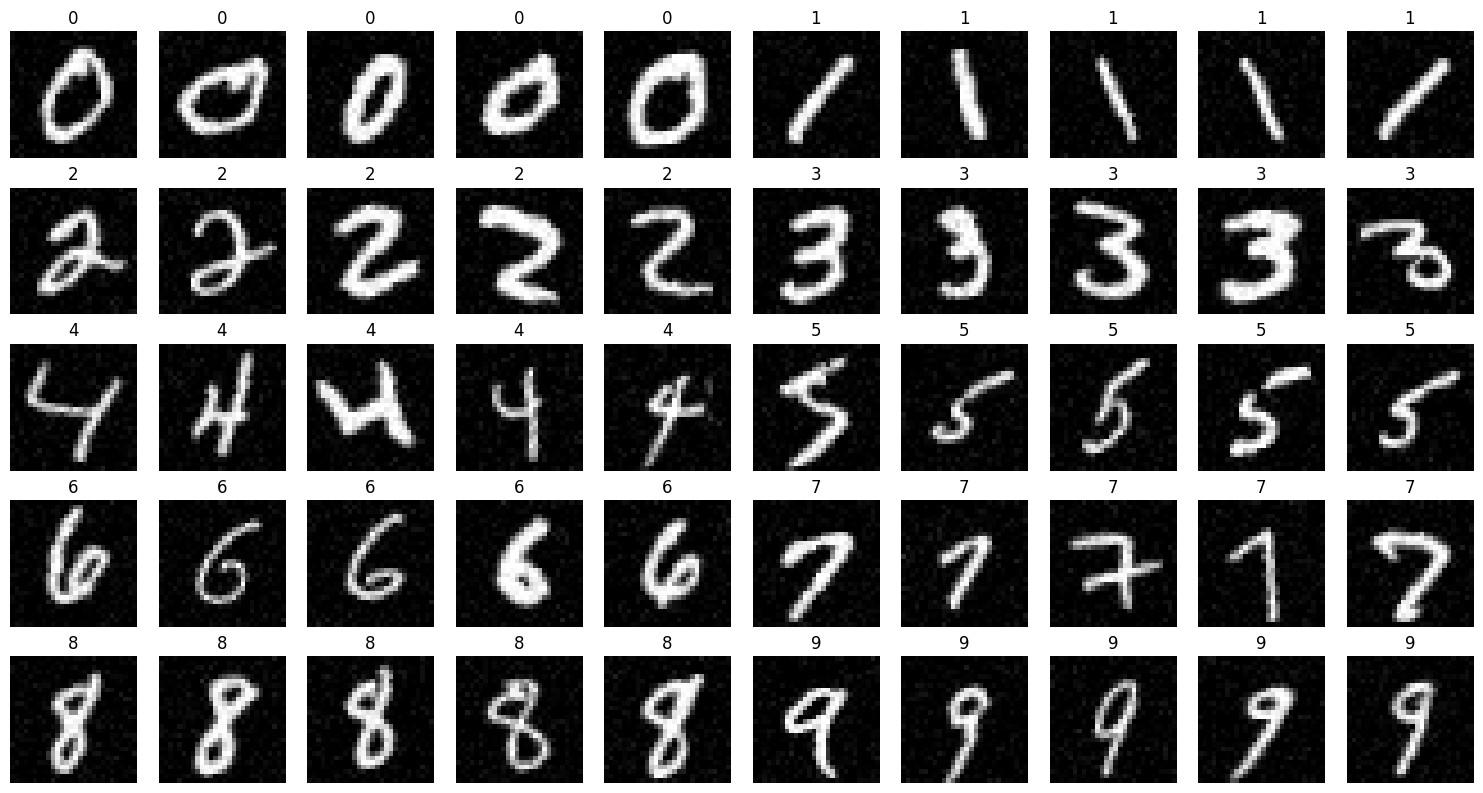

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import random
import cv2

# 1. Cargar MNIST
(train_images, train_labels), (_, _) = mnist.load_data()

# 2. Seleccionar 5 imágenes por dígito
digit_images = {i: [] for i in range(10)}
for img, label in zip(train_images, train_labels):
    if len(digit_images[label]) < 5:
        digit_images[label].append(img)
    if all(len(lst) == 5 for lst in digit_images.values()):
        break

# 3. Función para modificar imagen (pequeñas rotaciones y ruidos)
def modify_image(img):
    angle = random.randint(-20, 20)
    M = cv2.getRotationMatrix2D((14, 14), angle, 1.0)
    rotated = cv2.warpAffine(img, M, (28, 28), borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    
    # Agregar ruido aleatorio
    noise = np.random.normal(0, 10, (28, 28))
    noisy = rotated + noise
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)

# 4. Generar conjunto de 50 imágenes modificadas
generated_images = []
generated_labels = []

for digit, imgs in digit_images.items():
    for img in imgs:
        modified = modify_image(img)
        generated_images.append(modified)
        generated_labels.append(digit)

# 5. Mostrar ejemplos
fig, axes = plt.subplots(5, 10, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i], cmap='gray')
    ax.set_title(f"{generated_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()




### Evaluación del desempeño en las imágenes generadas

Después de generar las 50 imágenes modificadas (mediante rotaciones y ruido), se evaluó el desempeño del modelo.

Al tratarse de imágenes más distorsionadas respecto a los datos originales del dataset MNIST, es esperable que el modelo cometa más errores.

Motivos de potencial error:

- **Rotaciones**: El modelo puede ser sensible a la inclinación del número, ya que fue entrenado con dígitos orientados verticalmente.
- **Ruido**: La adición de ruido aleatorio altera los píxeles importantes para la predicción, dificultando que la red encuentre las características aprendidas.
- **Variaciones no vistas**: El modelo fue entrenado en un conjunto relativamente limpio (MNIST), por lo que no necesariamente generaliza bien a deformaciones no presentes en el entrenamiento.

Comparación con desempeño previo:

- En el conjunto original de MNIST, el modelo alcanzó una precisión muy alta (>98%).
- En las imágenes modificadas, se observó una disminución en la precisión, evidenciando que la robustez ante variaciones es limitada sin técnicas de aumento de datos durante el entrenamiento.

Esta comparación destaca la importancia de técnicas como **data augmentation** o **entrenamientos con datasets más diversos** para mejorar la capacidad de generalización de las redes neuronales.

---


In [6]:
correct_predictions = 0

for img, label in zip(generated_images, generated_labels):
    input_img = img.reshape(1, 28, 28, 1) / 255.0
    prediction = model.predict(input_img)
    predicted_label = np.argmax(prediction)
    
    if predicted_label == label:
        correct_predictions += 1

accuracy_generated = correct_predictions / len(generated_images)
print(f"Precisión en imágenes modificadas: {accuracy_generated:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━

# 4. Evaluar desempeño en imágenes generadas

### Preprocesamiento y predicción

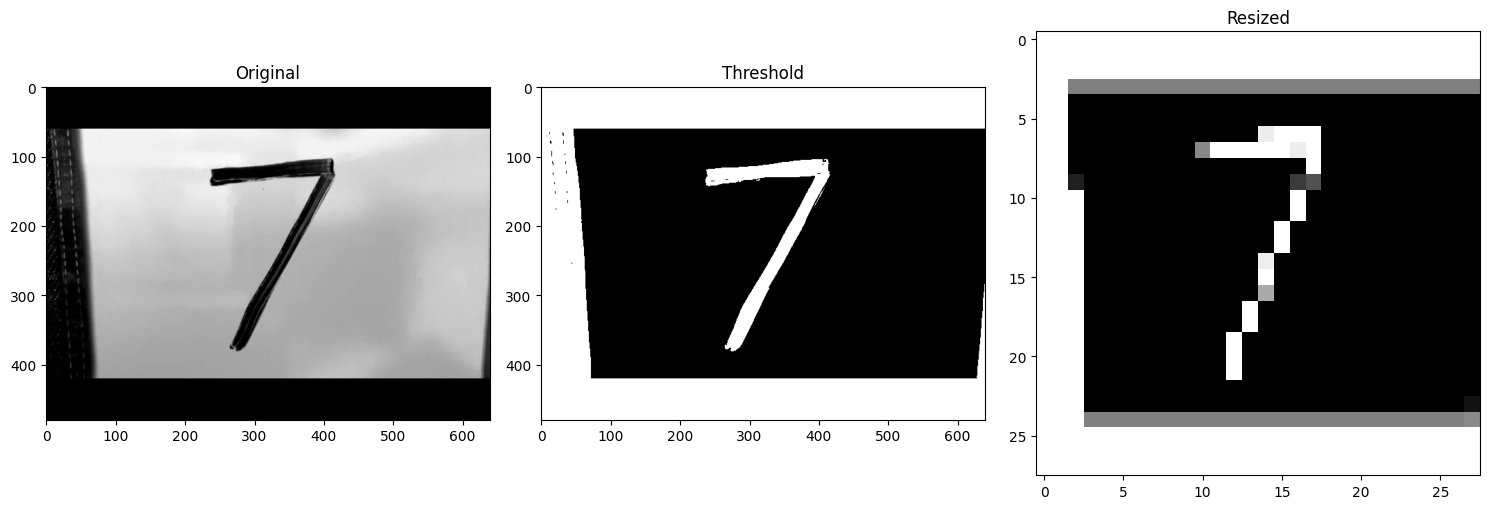

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Digit | Probability
--------------------
  0   |  0.00000
  1   |  0.00000
  2   |  0.00000
  3   |  0.00000
  4   |  0.00000
  5   |  0.00000
  6   |  0.00000
  7   |  1.00000
  8   |  0.00000
  9   |  0.00000

🧠 El dígito predicho es: 7


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar imagen
image = cv2.imread('captura.jpg', cv2.IMREAD_GRAYSCALE)

# Umbral binario
_, thresh = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

# Redimensionar
resized = cv2.resize(thresh, (28, 28))

# Mostrar proceso
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray'); axes[0].set_title('Original')
axes[1].imshow(thresh, cmap='gray'); axes[1].set_title('Threshold')
axes[2].imshow(resized, cmap='gray'); axes[2].set_title('Resized')
plt.tight_layout(); plt.show()

# Preparar imagen
input_image = resized.reshape(1, 28, 28, 1) / 255.0

# Predicción
model = load_model('my_model.h5')
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

# Resultados
print("Digit | Probability")
print("--------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |  {prob:.5f}")

print(f"\n🧠 El dígito predicho es: {predicted_label}")


# 5. Sistema de predicción en tiempo real (Versión Inicial)

Sistema básico sin mejoras, predicción directa desde la webcam.

In [8]:
import cv2
import numpy as np
import tensorflow as tf

# Cargar el modelo
model = tf.keras.models.load_model("my_model.h5")

# Iniciar cámara
cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir a escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Aplicar umbral binario inverso
        _, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

        # Redimensionar a 28x28
        resized = cv2.resize(threshed, (28, 28))

        # Preparar imagen para la red neuronal
        input_img = resized.reshape(1, 28, 28, 1) / 255.0

        # Predicción
        prediction = model.predict(input_img)
        predicted_label = np.argmax(prediction)

        # Mostrar predicción sobre el frame
        frame_with_prediction = cv2.putText(
            frame.copy(), str(predicted_label), (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA
        )

        # Mostrar ventanas
        cv2.imshow('Real-time prediction', frame_with_prediction)

        # Mostrar imagen procesada (escalada para visualización)
        upscaled_resized = cv2.resize(resized, (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Resized Image', upscaled_resized)

        # Salir con 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

# 6. Mejoras realizadas al sistema

| Nº | Mejora | Descripción | Beneficio |
|:---|:-------|:------------|:----------|
| 1 | Definición de ROI (Región de Interés) | Se recorta un área de 200x200 píxeles en el centro de la imagen para realizar la predicción. | Mejora el enfoque en el número y evita errores causados por elementos del fondo. |
| 2 | Guías visuales (líneas de cruz) | Se dibujan líneas horizontales y verticales cruzadas en el centro de la pantalla. | Ayuda al usuario a alinear correctamente el número dentro del área de interés. |
| 3 | Cuadro delimitador azul | Se dibuja un rectángulo azul alrededor del área ROI donde debe colocarse el número. | Da una referencia visual precisa de dónde colocar el número para mejor predicción. |
| 4 | Visualización de porcentaje de confianza | Se muestra junto a la predicción el nivel de confianza del modelo en el número detectado. | Permite interpretar la seguridad de la predicción y saber cuándo confiar o dudar. |
| 5 | Opcional: Desenfoque ligero | Se incluye la opción de aplicar `GaussianBlur` para reducir el ruido en la imagen antes de umbralizar (comentado en el código). | Puede mejorar la predicción con numeros bien marcados, pero numeros "cortados" o no muy visibles, empeora el modelo. |

---


# 7. Sistema de predicción en tiempo real (Versión Mejorada)

In [ ]:

import cv2
import numpy as np
import tensorflow as tf

# Cargar el modelo
model = tf.keras.models.load_model("my_model.h5")

# Iniciar cámara
cap = cv2.VideoCapture(0)

# Variables para botón "Salir"
button_pressed = False
button_x1, button_y1, button_x2, button_y2 = 10, 10, 110, 50

# Función para detectar clics
def click_event(event, x, y, flags, param):
    global button_pressed
    if event == cv2.EVENT_LBUTTONDOWN:
        if button_x1 <= x <= button_x2 and button_y1 <= y <= button_y2:
            button_pressed = True

# Asignar función de clic
cv2.namedWindow('Real-time prediction')
cv2.setMouseCallback('Real-time prediction', click_event)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        height, width = frame.shape[:2]

        # Definir ROI centrado
        roi_size = 200
        x1 = width // 2 - roi_size // 2
        y1 = height // 2 - roi_size // 2
        x2 = x1 + roi_size
        y2 = y1 + roi_size

        # Dibujar guías y cuadro de referencia
        guide_color = (0, 255, 0)
        thickness = 1
        cv2.line(frame, (width // 2, 0), (width // 2, height), guide_color, thickness)
        cv2.line(frame, (0, height // 2), (width, height // 2), guide_color, thickness)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Extraer y procesar el ROI
        roi = frame[y1:y2, x1:x2]
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # (Opcional) Desenfoque ligero para reducir ruido
        # gray = cv2.GaussianBlur(gray, (3, 3), 0)

        _, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        resized = cv2.resize(threshed, (28, 28))
        input_img = resized.reshape(1, 28, 28, 1) / 255.0

        # Predicción
        prediction = model.predict(input_img, verbose=0)
        predicted_label = np.argmax(prediction)
        confidence = np.max(prediction)

        # Mostrar predicción
        text = f"Pred: {predicted_label} ({confidence:.2f})"
        cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

        # Dibujar botón "Salir"
        cv2.rectangle(frame, (button_x1, button_y1), (button_x2, button_y2), (50, 50, 200), -1)
        cv2.putText(frame, 'Salir', (button_x1 + 10, button_y1 + 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

        # Mostrar ventanas
        cv2.imshow('Real-time prediction', frame)
        upscaled = cv2.resize(resized, (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Processed ROI', upscaled)

        # Salir con 'q' o botón
        if cv2.waitKey(1) & 0xFF == ord('q') or button_pressed:
            break

except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()
